In [3]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers , models
import matplotlib.pyplot as plt

In [5]:
(x_train,y_train) , (x_test,y_test) = datasets.cifar10.load_data() # x = data , y = labels index

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4322s 25us/step


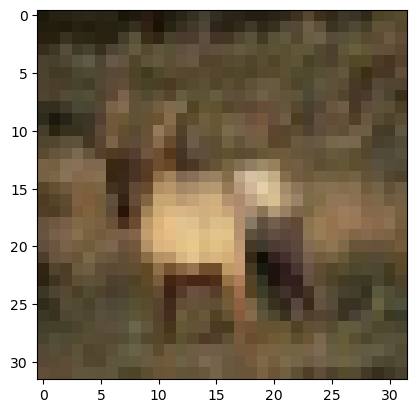

In [20]:
plt.imshow(x_train[3])

In [9]:
x_train.shape

(50000, 32, 32, 3)

In [21]:
y_train[:5] # 2d array

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [23]:
y_train = y_train.reshape(-1,)

In [24]:
y_train[:5] # 1D array

array([6, 9, 9, 4, 1], dtype=uint8)

In [22]:
y_train.shape

(50000, 1)

In [10]:
x_test.shape

(10000, 32, 32, 3)

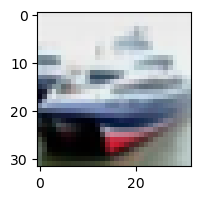

In [13]:
plt.figure(figsize = (15,2))
plt.imshow(x_test[1])

In [14]:
classes = ["airplane","automobile","bird","dog","cat","deer","frog","horse","ship","truck"]

In [26]:
def plot_sample(x,y,index):
    plt.figure(figsize = (15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]]) # for labeling by name
    # plt.xlabel(classes[y[index]])


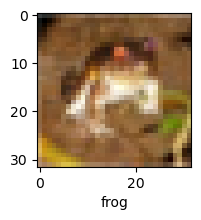

In [27]:
plot_sample(x_train,y_train,0)

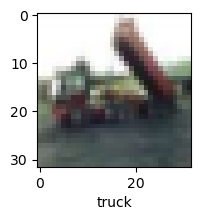

In [28]:
plot_sample(x_train,y_train,2)

In [29]:
#Normalize

x_train = x_train / 255
x_test = x_test / 255


In [38]:
x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [43]:
#Implementation of ANN

ann = models.Sequential([
    layers.Flatten(input_shape = (32,32,3)), # 32 X 32 and rgb means 3 chanels
    layers.Dense(3000 , activation = 'relu'),
    layers.Dense(1000 , activation = 'relu'),
    layers.Dense(10,activation = 'softmax') # we need 10 output neuron for 10 catagory
])

In [44]:
#Compile and train our model

ann.compile(optimizer = 'SGD',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy']
           )

In [ ]:
#we are using direct index value thats why we use sparse_categorical_crossentropy
# suppose , categorical_crossentropy
        # for bird , y = [0 0 1 0 0 0 0 0 0 0]
            # sparse_categorical_crossentropy
                # y = 2

In [46]:
#train model

ann.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 19ms/step - accuracy: 0.3048 - loss: 1.9276
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.4167 - loss: 1.6525
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.4512 - loss: 1.5550
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.4757 - loss: 1.4921
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.4966 - loss: 1.4342
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.5101 - loss: 1.3881
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.5231 - loss: 1.3539
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.5397 - loss: 1.3108
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.5529 - loss: 1.2819
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.5619 - loss: 1.2515


In [47]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np


In [48]:
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [51]:
#claasificarion
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.45      0.55      1000
           1       0.76      0.41      0.53      1000
           2       0.35      0.55      0.43      1000
           3       0.35      0.44      0.39      1000
           4       0.43      0.42      0.43      1000
           5       0.61      0.17      0.27      1000
           6       0.52      0.62      0.56      1000
           7       0.80      0.38      0.51      1000
           8       0.70      0.51      0.59      1000
           9       0.36      0.84      0.51      1000

    accuracy                           0.48     10000
   macro avg       0.56      0.48      0.48     10000
weighted avg       0.56      0.48      0.48     10000



In [66]:
#Implementation of CNN
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)), # this can detect 32 different features
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [62]:
#Implementation of CNN

cnn = models.Sequential([
    #add a conv layer

    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)),

    # #add another conv layer
    # layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    # layers.MaxPooling2D((2,2)),

    # layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    # layers.MaxPooling2D((2,2)),

    #dense layer
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
    
])


In [ ]:
#sigmoid :
    # 1 : 0.45
    # 2 : 0.67
    # sum will not be 1 alaways

#softmax : total sum will be 1 --- normalize the values
     # .45 / (.45 + .67)
     # .67 / (.45 + 67)
     # sum will be 1 always

In [69]:
#Compile 

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [71]:
#train our model

cnn.fit(x_train, y_train, epochs=20)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.3840 - loss: 1.6930
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6120 - loss: 1.1108
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6674 - loss: 0.9643
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6952 - loss: 0.8808
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7203 - loss: 0.8084
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7376 - loss: 0.7567
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7554 - loss: 0.7057
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7653 - loss: 0.6685
Epoch 9/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7837 - loss: 0.6240
Epoch 10/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7976 - loss: 0.5839
Epoch 11/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8087 - loss: 0.5484
Epoch 12/20
1563/1563 ━━━━━━━━

In [72]:
cnn.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6866 - loss: 1.2406


[1.2508805990219116, 0.6836000084877014]

In [73]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [74]:
y_test = y_test.reshape(-1,)

In [75]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

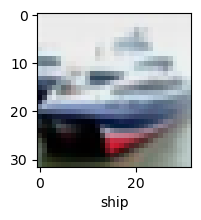

In [76]:
plot_sample(x_test,y_test,1)

In [77]:
y_pred = cnn.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [78]:
y_pred[:5]

array([[5.0078677e-07, 1.8698417e-08, 3.3131486e-10, 9.9809390e-01,
        1.6803260e-06, 1.9032793e-03, 4.7525859e-07, 1.3033216e-09,
        6.4170983e-08, 3.3150226e-08],
       [1.1113595e-08, 5.3148407e-05, 1.1222661e-15, 2.3863732e-12,
        1.3262569e-16, 1.3120176e-14, 1.4273635e-14, 2.2398473e-18,
        9.9994385e-01, 2.9757980e-06],
       [4.1649781e-02, 7.6587893e-02, 1.4562022e-06, 6.8244328e-05,
        3.1313925e-06, 5.8076937e-05, 2.7044562e-06, 1.6507230e-06,
        8.6406666e-01, 1.7560532e-02],
       [8.4456474e-01, 1.1122893e-04, 1.9558128e-04, 1.0910888e-06,
        2.6695248e-05, 8.5525734e-08, 4.2549814e-06, 2.0374445e-08,
        1.5509365e-01, 2.6315522e-06],
       [5.9546883e-09, 7.9334194e-07, 2.6198868e-03, 6.4723392e-04,
        7.9507959e-01, 1.1926738e-04, 2.0153110e-01, 6.9326100e-09,
        1.5392893e-06, 5.9061006e-07]], dtype=float32)

In [80]:
np.argmax([3,4,5,6,32,12]) # return the index of max element

4

In [83]:
y_pred[9]

array([2.6986212e-05, 2.6836342e-01, 1.7616230e-06, 5.4095842e-08,
       4.2496740e-06, 7.0831767e-08, 1.9526315e-06, 1.0748957e-06,
       3.4321478e-05, 7.3156619e-01], dtype=float32)

In [84]:
np.argmax(y_pred[6]) # element of index 9 has the max value

9

In [85]:
y_classes = [np.argmax(element) for element in y_pred]

In [87]:
y_test[:10] # actual value

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

In [88]:
y_classes[:10] # predicted value

[3, 8, 8, 0, 4, 6, 9, 3, 3, 9]

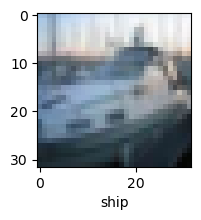

In [90]:
plot_sample(x_test,y_test,2) # for index = 2

In [91]:
#index 2

y_classes[2]

8

In [92]:
classes[y_classes[2]] # matched

'ship'

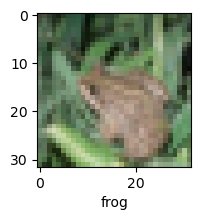

In [93]:
plot_sample(x_test,y_test,4) # for index = 4

In [95]:
classes[y_classes[4]] # not matched

'cat'

In [96]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.68      0.72      1000
           1       0.79      0.82      0.80      1000
           2       0.57      0.58      0.58      1000
           3       0.46      0.52      0.49      1000
           4       0.71      0.55      0.62      1000
           5       0.56      0.65      0.60      1000
           6       0.73      0.77      0.75      1000
           7       0.80      0.70      0.75      1000
           8       0.77      0.81      0.79      1000
           9       0.76      0.76      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000

